## Similar Regression Project

In [1]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
%matplotlib inline
import warnings

In [2]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [3]:
warnings.filterwarnings('ignore')

In [4]:
pd.set_option('display.max_columns', None)
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [5]:
train.shape

(1460, 81)

### Target Variable and Its correlation

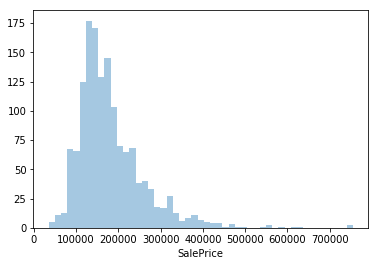

In [6]:
#target variable
sb.distplot(train['SalePrice'],kde=False)

In [7]:
print('skewness: %f' %train['SalePrice'].skew())
print('kurtosis:%f' %train['SalePrice'].kurt())

skewness: 1.882876
kurtosis:6.536282


As we've seen before, there are so many columns to work with, so let's try to figure out the correlations to get a better idea of which columns are strongly related to the Sale Price of the house. This will help us eliminating the features that won't do a good job predicting the Sale Price.

In [8]:
cormat = train.corr()

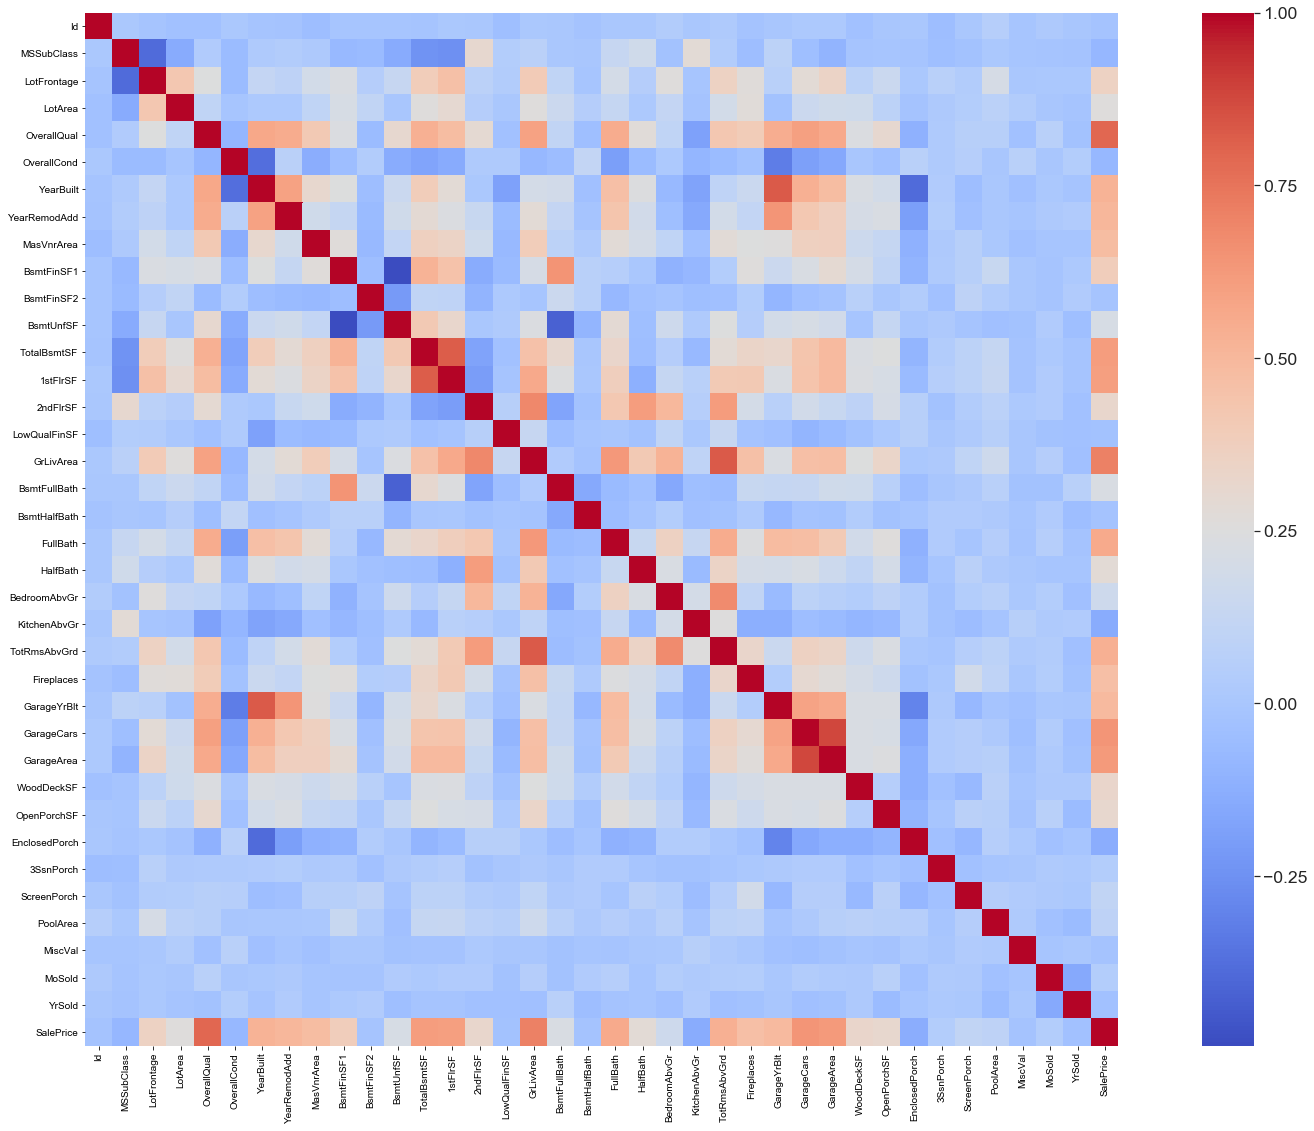

In [9]:
f, ax = plt.subplots(figsize=(30,19))
sb.set(font_scale=1.6)
sb.heatmap(cormat, square=True, cmap='coolwarm')

In [10]:
bestcorr = cormat['SalePrice'].sort_values(ascending=False)
bestfeatures = bestcorr.index[1:10]

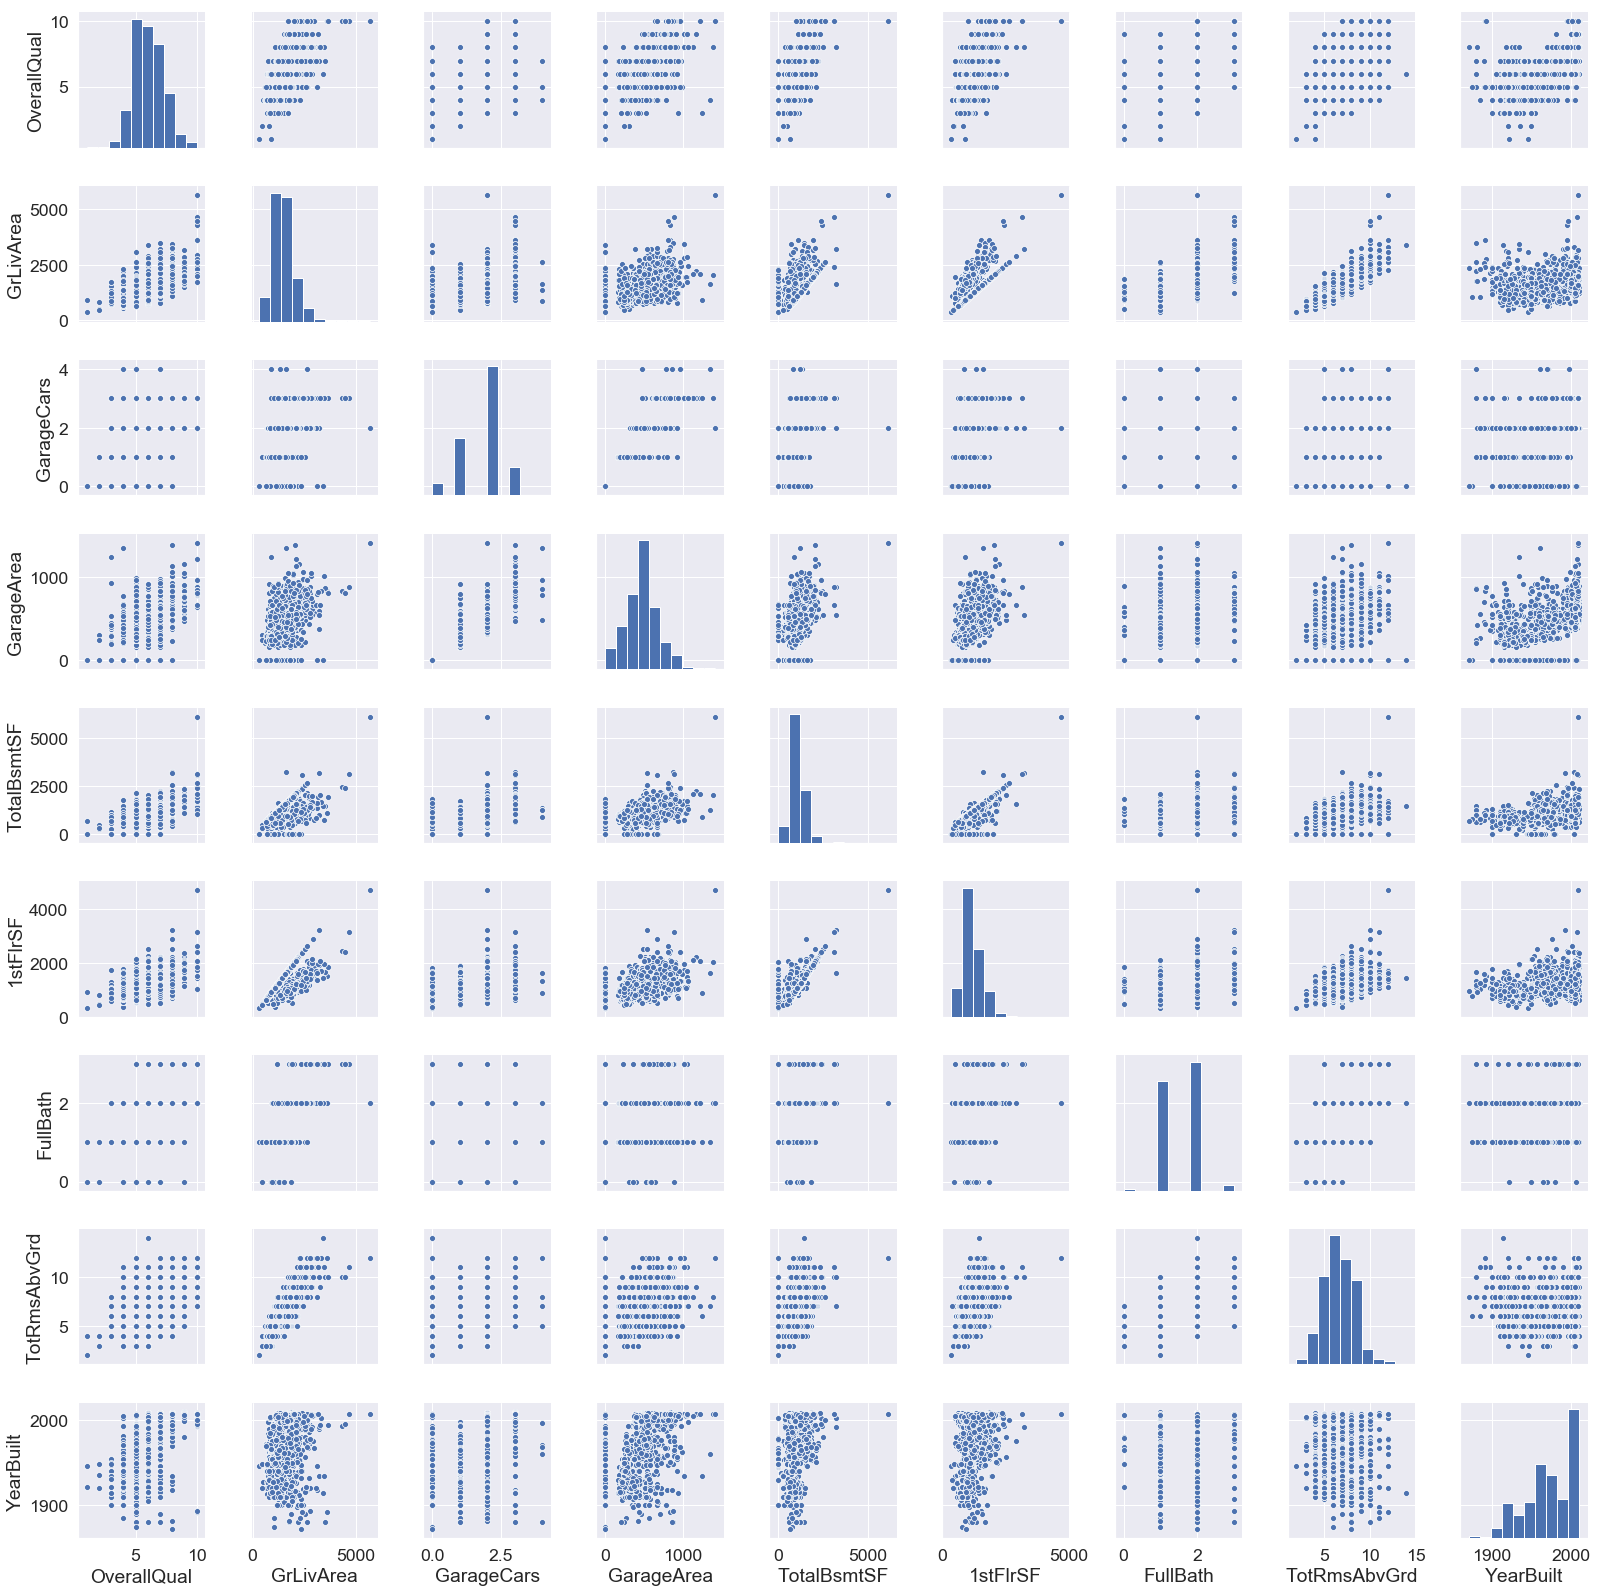

In [11]:
sb.pairplot(train[bestfeatures])

#### Missing values

In [12]:
train1 = train.drop('Id', axis=1)

In [13]:
#Based on the description data file provided, all the variables who have meaningfull Nan

null_with_meaning = ["Alley", "BsmtQual", "BsmtCond", "BsmtExposure", "BsmtFinType1", "BsmtFinType2", "FireplaceQu", "GarageType", "GarageFinish", "GarageQual", "GarageCond", "PoolQC", "Fence", "MiscFeature"]

In [14]:
for i in null_with_meaning:
    train1[i]=train1[i].fillna('None')

In [15]:
train_null = train1.isnull().sum()

In [16]:
null_many = train_null[train_null>200]

In [17]:
null_many

LotFrontage    259
dtype: int64

In [18]:
#drops 'LotFrontage'
train1 = train1.drop('LotFrontage', axis=1)

In [19]:
df_num = train1.select_dtypes(exclude=object)

In [20]:
df_chr = train1.select_dtypes(include=object)

In [21]:
num_var = list(df_num.columns)

for i in num_var:
    df_num[i].fillna(df_num[i].mode()[0],inplace=True)

In [22]:
from sklearn.impute import SimpleImputer

In [23]:
freq_imp = SimpleImputer(strategy='most_frequent')

In [24]:
df_chr.columns

Index(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature',
       'SaleType', 'SaleCondition'],
      dtype='object')

In [25]:
char_var =['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature',
       'SaleType', 'SaleCondition']

In [26]:
for j in char_var:
    df_chr[[j]] = freq_imp.fit_transform(df_chr[[j]])

In [27]:
df_dum = pd.get_dummies(df_chr, drop_first=True)

In [28]:
train2 = pd.concat([df_num,df_dum],axis=1)

In [29]:
train2.isnull().sum()

MSSubClass               0
LotArea                  0
OverallQual              0
OverallCond              0
YearBuilt                0
                        ..
SaleCondition_AdjLand    0
SaleCondition_Alloca     0
SaleCondition_Family     0
SaleCondition_Normal     0
SaleCondition_Partial    0
Length: 259, dtype: int64

### Feature Engineering

In [30]:
df_train_add = train2.copy()

df_train_add['TotalSF']=df_train_add['TotalBsmtSF'] + df_train_add['1stFlrSF'] + df_train_add['2ndFlrSF']

df_train_add['Total_Bathrooms'] = (df_train_add['FullBath'] + (0.5 * df_train_add['HalfBath']) +
                               df_train_add['BsmtFullBath'] + (0.5 * df_train_add['BsmtHalfBath']))

df_train_add['Total_porch_sf'] = (df_train_add['OpenPorchSF'] + df_train_add['3SsnPorch'] +
                              df_train_add['EnclosedPorch'] + df_train_add['ScreenPorch'] +
                              df_train_add['WoodDeckSF'])

In [31]:
## For ex, if PoolArea = 0 , Then HasPool = 0 too

df_train_add['haspool'] = df_train_add['PoolArea'].apply(lambda x: 1 if x > 0 else 0)
df_train_add['has2ndfloor'] = df_train_add['2ndFlrSF'].apply(lambda x: 1 if x > 0 else 0)
df_train_add['hasgarage'] = df_train_add['GarageArea'].apply(lambda x: 1 if x > 0 else 0)
df_train_add['hasbsmt'] = df_train_add['TotalBsmtSF'].apply(lambda x: 1 if x > 0 else 0)
df_train_add['hasfireplace'] = df_train_add['Fireplaces'].apply(lambda x: 1 if x > 0 else 0)

In [32]:
df_train_add = df_train_add.drop(['TotalBsmtSF','1stFlrSF','2ndFlrSF','FullBath','HalfBath','BsmtFullBath',
                                 'BsmtHalfBath','OpenPorchSF','3SsnPorch','EnclosedPorch','ScreenPorch','WoodDeckSF'], axis=1)

In [33]:
df_train_add.shape

(1460, 255)

In [34]:
#logscalling target to remove skewness
df_train_add['LogPrice'] = np.log(df_train_add['SalePrice'])

data preprocessing for test set

In [35]:
#same preprocessing for test set
test1 = test.drop('Id', axis=1)
test1 =test1.drop('LotFrontage', axis=1)

for i in null_with_meaning:
    test1[i]=test1[i].fillna('None')

df_num1 = test1.select_dtypes(exclude=object)
df_chr1 = test1.select_dtypes(include=object)


num_var1 = list(df_num1.columns)

for i in num_var1:
    df_num1[i].fillna(df_num1[i].mode()[0],inplace=True)


In [36]:
for j in char_var:
    df_chr1[[j]] = freq_imp.fit_transform(df_chr1[[j]])


In [37]:
df_dum2 = pd.get_dummies(df_chr1, drop_first=True)

test2 = pd.concat([df_dum2,df_num1],axis=1)
test2.isnull().sum()

MSZoning_FV    0
MSZoning_RH    0
MSZoning_RL    0
MSZoning_RM    0
Street_Pave    0
              ..
ScreenPorch    0
PoolArea       0
MiscVal        0
MoSold         0
YrSold         0
Length: 240, dtype: int64

In [38]:
df_test_add = test2.copy()

df_test_add['TotalSF']= df_test_add['TotalBsmtSF'] + df_test_add['1stFlrSF'] + df_test_add['2ndFlrSF']

df_test_add['Total_Bathrooms'] = (df_test_add['FullBath'] + (0.5 * df_test_add['HalfBath']) +
                               df_test_add['BsmtFullBath'] + (0.5 * df_test_add['BsmtHalfBath']))

df_test_add['Total_porch_sf'] = (df_test_add['OpenPorchSF'] + df_test_add['3SsnPorch'] +
                              df_test_add['EnclosedPorch'] + df_test_add['ScreenPorch'] +
                              df_test_add['WoodDeckSF'])

In [39]:
## For ex, if PoolArea = 0 , Then HasPool = 0 too

df_test_add['haspool'] = df_test_add['PoolArea'].apply(lambda x: 1 if x > 0 else 0)
df_test_add['has2ndfloor'] = df_test_add['2ndFlrSF'].apply(lambda x: 1 if x > 0 else 0)
df_test_add['hasgarage'] = df_test_add['GarageArea'].apply(lambda x: 1 if x > 0 else 0)
df_test_add['hasbsmt'] = df_test_add['TotalBsmtSF'].apply(lambda x: 1 if x > 0 else 0)
df_test_add['hasfireplace'] = df_test_add['Fireplaces'].apply(lambda x: 1 if x > 0 else 0)

In [40]:
df_test_add = df_test_add.drop(['TotalBsmtSF','1stFlrSF','2ndFlrSF','FullBath','HalfBath','BsmtFullBath',
                                 'BsmtHalfBath','OpenPorchSF','3SsnPorch','EnclosedPorch','ScreenPorch','WoodDeckSF'], axis=1)

In [41]:
df_test_add.shape

(1459, 236)

In [44]:
df_dum.shape

(1460, 223)

In [45]:
df_dum2.shape

(1459, 205)

# Model fitting

In [54]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score, KFold
from sklearn.preprocessing import StandardScaler

In [47]:
X_train = df_train_add.drop(["SalePrice","LogPrice"], axis=1)
y_train = df_train_add["LogPrice"]

In [55]:
from sklearn.model_selection import train_test_split #to create validation data set

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=0)

In [56]:
scaler = StandardScaler()
X_training = pd.DataFrame(scaler.fit_transform(X_train), columns= X_train.columns)
y_train1 = y_train.values.reshape(-1,1)
y_training = scaler.fit_transform(y_train1)

In [59]:
X_valid = pd.DataFrame(scaler.fit_transform(X_val), columns= X_val.columns)
y_test1 = y_val.values.reshape(-1,1)
y_valid = scaler.fit_transform(y_test1)

In [104]:
#result df
result_df = pd.DataFrame(index=['Decision Tree Regression','Linear Regression Model','Ridge Model','Random Forest Regression','Gradient Boosting Regression','XGB Model'], 
                         columns=['R^2 Score','RMSE Score'])

### Decision Tree Regression

In [60]:
dtreg = DecisionTreeRegressor(random_state = 100)
parameters_dtr = {"criterion" : ["mse", "friedman_mse", "mae"], "splitter" : ["best", "random"], "min_samples_split" : [2, 3, 5, 10], 
                  "max_features" : ["auto", "log2"]}
grid_dtr = GridSearchCV(dtreg, parameters_dtr, verbose=1, scoring="r2")
grid_dtr.fit(X_training, y_training)

print("Best DecisionTreeRegressor Model: " + str(grid_dtr.best_estimator_))
print("Best Score: " + str(grid_dtr.best_score_))

Fitting 3 folds for each of 48 candidates, totalling 144 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Best DecisionTreeRegressor Model: DecisionTreeRegressor(criterion='friedman_mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=10,
                      min_weight_fraction_leaf=0.0, presort=False,
                      random_state=100, splitter='best')
Best Score: 0.713841832287271


[Parallel(n_jobs=1)]: Done 144 out of 144 | elapsed:    5.6s finished


In [105]:
dtr = grid_dtr.best_estimator_
dtreg.fit(X_training, y_training)
dtr_pred = dtreg.predict(X_valid)
r2_dtr = r2_score(y_valid, dtr_pred)
rmse_dtr = np.sqrt(mean_squared_error(y_valid, dtr_pred))
print("R^2 Score: " + str(r2_dtr))
print("RMSE Score: " + str(rmse_dtr))
result_df.loc['Decision Tree Regression','R^2 Score']  = r2_dtr
result_df.loc['Decision Tree Regression','RMSE Score']= rmse_dtr

R^2 Score: 0.7817853146143594
RMSE Score: 0.46713454741181426


In [62]:
#cross validation
scores_dtr = cross_val_score(dtreg, X_training, y_training, cv=10, scoring="r2")
print("Cross Validation Score: " + str(np.mean(scores_dtr)))

Cross Validation Score: 0.7018958150361969


### Linear Regression Model

In [63]:
linreg = LinearRegression()
parameters_lin = {"fit_intercept" : [True, False], "normalize" : [True, False], "copy_X" : [True, False]}
grid_linreg = GridSearchCV(linreg, parameters_lin, verbose=1 , scoring = "r2")
grid_linreg.fit(X_training, y_training)

print("Best LinReg Model: " + str(grid_linreg.best_estimator_))
print("Best Score: " + str(grid_linreg.best_score_))

Fitting 3 folds for each of 8 candidates, totalling 24 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Best LinReg Model: LinearRegression(copy_X=True, fit_intercept=False, n_jobs=None, normalize=True)
Best Score: -2.2881025184817488e+21


[Parallel(n_jobs=1)]: Done  24 out of  24 | elapsed:    1.2s finished
C:\Users\ERANDI DUNUMALAGE\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


In [106]:
linreg = grid_linreg.best_estimator_
linreg.fit(X_training, y_training)
lin_pred = linreg.predict(X_valid)
r2_lin = r2_score(y_valid, lin_pred)
rmse_lin = np.sqrt(mean_squared_error(y_valid, lin_pred))
print("R^2 Score: " + str(r2_lin))
print("RMSE Score: " + str(rmse_lin))
result_df.loc['Linear Regression Model','R^2 Score']  = r2_lin
result_df.loc['Linear Regression Model','RMSE Score']= rmse_lin

R^2 Score: -8.534257857313345e+19
RMSE Score: 9238104706.763906


In [65]:
scores_lin = cross_val_score(linreg, X_training, y_training, cv=10, scoring="r2")
print("Cross Validation Score: " + str(np.mean(scores_lin)))

Cross Validation Score: -7.730138488966209e+22


### Ridge Model

In [66]:
ridge = Ridge()
parameters_ridge = {"fit_intercept" : [True, False], "normalize" : [True, False], "copy_X" : [True, False], "solver" : ["auto"]}
grid_ridge = GridSearchCV(ridge, parameters_ridge, verbose=1, scoring="r2")
grid_ridge.fit(X_training, y_training)

print("Best Ridge Model: " + str(grid_ridge.best_estimator_))
print("Best Score: " + str(grid_ridge.best_score_))

Fitting 3 folds for each of 8 candidates, totalling 24 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Best Ridge Model: Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)
Best Score: 0.864377340195603


[Parallel(n_jobs=1)]: Done  24 out of  24 | elapsed:    0.3s finished
C:\Users\ERANDI DUNUMALAGE\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


In [108]:
ridge = grid_ridge.best_estimator_
ridge.fit(X_training, y_training)
ridge_pred = ridge.predict(X_valid)
r2_ridge = r2_score(y_valid, ridge_pred)
rmse_ridge = np.sqrt(mean_squared_error(y_valid, ridge_pred))
print("R^2 Score: " + str(r2_ridge))
print("RMSE Score: " + str(rmse_ridge))
result_df.loc['Ridge Model','R^2 Score']  = r2_ridge
result_df.loc['Ridge Model','RMSE Score']= rmse_ridge

R^2 Score: 0.8838881684509424
RMSE Score: 0.34075186213586206


In [68]:
scores_ridge = cross_val_score(ridge, X_training, y_training, cv=10, scoring="r2")
print("Cross Validation Score: " + str(np.mean(scores_ridge)))

Cross Validation Score: 0.8707679662999961


### Random Forest Regression

In [69]:
rfr = RandomForestRegressor()
paremeters_rf = {"n_estimators" : [5, 10, 15, 20], "criterion" : ["mse" , "mae"], "min_samples_split" : [2, 3, 5, 10], 
                 "max_features" : ["auto", "log2"]}
grid_rf = GridSearchCV(rfr, paremeters_rf, verbose=1, scoring="r2")
grid_rf.fit(X_training, y_training)

print("Best RandomForestRegressor Model: " + str(grid_rf.best_estimator_))
print("Best Score: " + str(grid_rf.best_score_))

Fitting 3 folds for each of 64 candidates, totalling 192 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 192 out of 192 | elapsed:  1.2min finished


Best RandomForestRegressor Model: RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=3,
                      min_weight_fraction_leaf=0.0, n_estimators=15,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)
Best Score: 0.8489644207362919


In [115]:
rf = grid_rf.best_estimator_
rf.fit(X_training, y_training)
rf_pred = rfr.predict(X_valid)
r2_rf = r2_score(y_valid, rf_pred)
rmse_rf = np.sqrt(mean_squared_error(y_valid, rf_pred))
print("R^2 Score: " + str(r2_rf))
print("RMSE Score: " + str(rmse_rf))
result_df.loc['Random Forest Regression','R^2 Score']  = r2_rf
result_df.loc['Random Forest Regression','RMSE Score']= rmse_rf

R^2 Score: 0.8736193592994992
RMSE Score: 0.3555005495080152


In [71]:
scores_rf = cross_val_score(rfr, X_training, y_training, cv=10, scoring="r2")
print("Cross Validation Score: " + str(np.mean(scores_rf)))

Cross Validation Score: 0.8467639111931536


### Gradient Boosting Regression

In [73]:
from sklearn import ensemble
params = {'n_estimators': 20000, 'max_depth': 5, 'min_samples_split': 2,
          'learning_rate': 0.05, 'loss': 'ls' , 'max_features' : 20}
clf = ensemble.GradientBoostingRegressor(**params)

clf.fit(X_training, y_training)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
                          learning_rate=0.05, loss='ls', max_depth=5,
                          max_features=20, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=20000,
                          n_iter_no_change=None, presort='auto',
                          random_state=None, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

In [74]:
clf_pred=clf.predict(X_valid)
clf_pred= clf_pred.reshape(-1,1)
r2_clf = r2_score(y_valid, clf_pred)
rmse_clf = np.sqrt(mean_squared_error(y_valid, clf_pred))
print("R^2 Score: " + str(r2_clf))
print("RMSE Score: " + str(rmse_clf))

R^2 Score: 0.911806474008096
RMSE Score: 0.2969739483387457


In [75]:
scores_clf = cross_val_score(clf, X_training, y_training, cv=10, scoring="r2")
print("Cross Validation Score: " + str(np.mean(scores_clf)))

Cross Validation Score: 0.8932357001423645


### XGB Model

In [77]:
from xgboost import XGBRegressor
xgboost = XGBRegressor(learning_rate=0.01,n_estimators=20000,
                                     max_depth=3, min_child_weight=0,
                                     gamma=0, subsample=0.7,
                                     colsample_bytree=0.7,
                                     objective='reg:linear', nthread=-1,
                                     scale_pos_weight=1, seed=27,
                                     reg_alpha=0.006)
xgb = xgboost.fit(X_training, y_training)

[18:00:55] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [78]:
xgb_pred = xgb.predict(X_valid)
r2_xgb = r2_score(y_valid, xgb_pred)
rmse_xgb = np.sqrt(mean_squared_error(y_valid, xgb_pred))
print("R^2 Score: " + str(r2_xgb))
print("RMSE Score: " + str(rmse_xgb))

R^2 Score: 0.9017806607227232
RMSE Score: 0.3133996478576145


#### Hyper-parameter tunning Gradient Boosting Regression

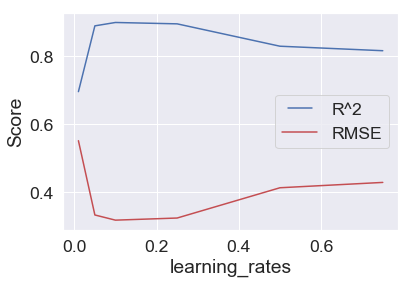

In [82]:
#learning_rates
learning_rates = [0.75 ,0.5, 0.25, 0.1, 0.05, 0.01]

r2_results = []
rmse_results = []

for eta in learning_rates:
    model = ensemble.GradientBoostingRegressor(learning_rate=eta)
    model.fit(X_training, y_training)
    y_pred = model.predict(X_valid)
    r2_clf = r2_score(y_valid, y_pred)
    rmse_clf = np.sqrt(mean_squared_error(y_valid, y_pred))
    r2_results.append(r2_clf)
    rmse_results.append(rmse_clf)
    
from matplotlib.legend_handler import HandlerLine2D
line1, = plt.plot(learning_rates, r2_results, 'b', label='R^2')
line2, = plt.plot(learning_rates, rmse_results, 'r', label='RMSE')
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('Score')
plt.xlabel('learning_rates')
plt.show()

using a high learning rate results in overfitting. For this data, a learning rate of 0.1 is optimal.

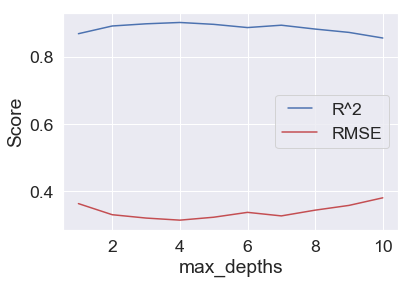

In [80]:
#maximum depth
max_depths = np.linspace(1, 10, 10, endpoint=True)
r2_results = []
rmse_results = []

for max_depth in max_depths:
    model = ensemble.GradientBoostingRegressor(max_depth=max_depth)
    model.fit(X_training, y_training)
    y_pred = model.predict(X_valid)
    r2_clf = r2_score(y_valid, y_pred)
    rmse_clf = np.sqrt(mean_squared_error(y_valid, y_pred))
    r2_results.append(r2_clf)
    rmse_results.append(rmse_clf)
    
from matplotlib.legend_handler import HandlerLine2D
line1, = plt.plot(max_depths, r2_results, 'b', label='R^2')
line2, = plt.plot(max_depths, rmse_results, 'r', label='RMSE')
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('Score')
plt.xlabel('max_depths')
plt.show()

Indicates depth of the tree, max_depth=4 seems optimal

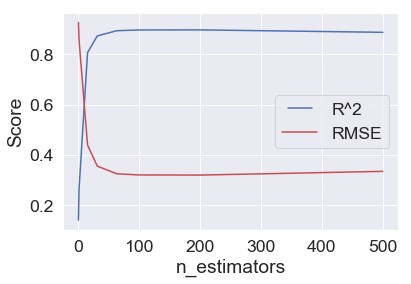

In [83]:
#n_estimators
n_estimators = [1, 2, 16, 32, 64, 100, 200, 500]
r2_results = []
rmse_results = []

for estimator in n_estimators:
    model = ensemble.GradientBoostingRegressor(n_estimators=estimator)
    model.fit(X_training, y_training)
    y_pred = model.predict(X_valid)
    r2_clf = r2_score(y_valid, y_pred)
    rmse_clf = np.sqrt(mean_squared_error(y_valid, y_pred))
    r2_results.append(r2_clf)
    rmse_results.append(rmse_clf)
    
from matplotlib.legend_handler import HandlerLine2D
line1, = plt.plot(n_estimators, r2_results, 'b', label='R^2')
line2, = plt.plot(n_estimators, rmse_results, 'r', label='RMSE')
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('Score')
plt.xlabel('n_estimators')
plt.show()

n_estimators = 100 seems good fit

#### Hyper-parameter tunning XGB

In [88]:
import warnings
warnings.filterwarnings('ignore')

[18:35:18] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[18:35:19] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[18:35:20] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[18:35:21] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[18:35:23] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[18:35:26] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[18:35:29] WARNI

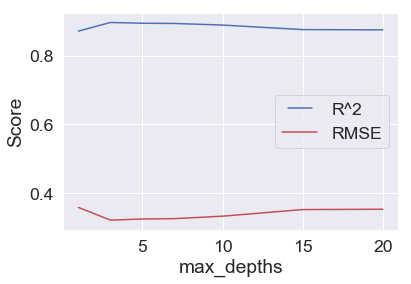

In [91]:
#maximum depth
max_depths = [1,3,5,7,10,15,20]
r2_results = []
rmse_results = []

for max_depth in max_depths:
    model = XGBRegressor(max_depth=max_depth)
    model.fit(X_training, y_training)
    y_pred = model.predict(X_valid)
    r2_clf = r2_score(y_valid, y_pred)
    rmse_clf = np.sqrt(mean_squared_error(y_valid, y_pred))
    r2_results.append(r2_clf)
    rmse_results.append(rmse_clf)
    
from matplotlib.legend_handler import HandlerLine2D
line1, = plt.plot(max_depths, r2_results, 'b', label='R^2')
line2, = plt.plot(max_depths, rmse_results, 'r', label='RMSE')
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('Score')
plt.xlabel('max_depths')
plt.show()

max_depth=3 seems optimal

[18:35:48] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[18:35:49] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[18:35:50] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[18:35:51] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[18:35:52] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[18:35:53] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


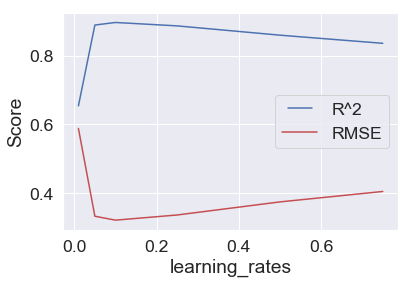

In [92]:
#eta
learning_rates = [0.75 ,0.5, 0.25, 0.1, 0.05, 0.01]

r2_results = []
rmse_results = []

for eta in learning_rates:
    model = XGBRegressor(learning_rate=eta)
    model.fit(X_training, y_training)
    y_pred = model.predict(X_valid)
    r2_clf = r2_score(y_valid, y_pred)
    rmse_clf = np.sqrt(mean_squared_error(y_valid, y_pred))
    r2_results.append(r2_clf)
    rmse_results.append(rmse_clf)
    
from matplotlib.legend_handler import HandlerLine2D
line1, = plt.plot(learning_rates, r2_results, 'b', label='R^2')
line2, = plt.plot(learning_rates, rmse_results, 'r', label='RMSE')
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('Score')
plt.xlabel('learning_rates')
plt.show()

eta=0.1 seems optimal

Final GBM

In [99]:
params = {'n_estimators': 100, 'max_depth': 4, 'min_samples_split': 2,
          'learning_rate': 0.1}
clf = ensemble.GradientBoostingRegressor(**params)

clf.fit(X_training, y_training)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
                          learning_rate=0.1, loss='ls', max_depth=4,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=100,
                          n_iter_no_change=None, presort='auto',
                          random_state=None, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

In [110]:
clf_pred=clf.predict(X_valid)
clf_pred= clf_pred.reshape(-1,1)
r2_clf = r2_score(y_valid, clf_pred)
rmse_clf = np.sqrt(mean_squared_error(y_valid, clf_pred))
print("R^2 Score: " + str(r2_clf))
print("RMSE Score: " + str(rmse_clf))
result_df.loc['Gradient Boosting Regression','R^2 Score']  = r2_clf
result_df.loc['Gradient Boosting Regression','RMSE Score']= rmse_clf

R^2 Score: 0.9010317815067846
RMSE Score: 0.31459214626753695


In [101]:
scores_clf = cross_val_score(clf, X_training, y_training, cv=10, scoring="r2")
print("Cross Validation Score: " + str(np.mean(scores_clf)))

Cross Validation Score: 0.8852145620075771


Final XGB

In [102]:
from xgboost import XGBRegressor
xgboost = XGBRegressor(learning_rate=0.1,n_estimators=20000,
                                     max_depth=3, min_child_weight=0,
                                     gamma=0, subsample=0.7,
                                     colsample_bytree=0.7,
                                     objective='reg:linear', nthread=-1,
                                     scale_pos_weight=1, seed=27,
                                     reg_alpha=0.006)
xgb = xgboost.fit(X_training, y_training)

[18:46:21] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [111]:
xgb_pred = xgb.predict(X_valid)
r2_xgb = r2_score(y_valid, xgb_pred)
rmse_xgb = np.sqrt(mean_squared_error(y_valid, xgb_pred))
print("R^2 Score: " + str(r2_xgb))
print("RMSE Score: " + str(rmse_xgb))
result_df.loc['XGB Model','R^2 Score']  = r2_xgb
result_df.loc['XGB Model','RMSE Score']= rmse_xgb

R^2 Score: 0.902151130029741
RMSE Score: 0.3128080401304592


### Results

In [116]:
result_df

,R^2 Score,RMSE Score
Decision Tree Regression,0.781785,0.467135
Linear Regression Model,-8.53426e+19,9.2381e+09
Ridge Model,0.883888,0.340752
Random Forest Regression,0.873619,0.355501
Gradient Boosting Regression,0.901032,0.314592
XGB Model,0.902151,0.312808


XGB model has the highest R2 score and lowest RMSE score

### Blending/ Stacking Models to obtain final Results

In [113]:
def blend_models_predict(X):
    return ((0.15 * ridge.predict(X)) + \
            (0.35 * gbm.predict(X)) + \
            (0.15 * rfr.predict(X)) + \
            (0.35 * xgb.predict(X)))

In [ ]:
predictions = blend_models_predict(df_test_add)
predictions1= np.round(scaler.inverse_transform(predictions),2)
predictions2 = np.exp(predictions1)